Since you’ve requested an explanation of diffusion models tailored for a beginner preparing for a master’s in AI, I’ll follow your specified response style, keeping the explanation clear, concise, and beginner-friendly. I’ll assume you have high school math and basic Python knowledge, and I’ll provide a complete breakdown as per your guidelines.

---

### 1. Simple Explanation of Diffusion Models (100–150 words)

Diffusion models are a class of generative AI models that create data, like images or audio, by mimicking a process of adding and then removing noise. Imagine starting with a clear image, gradually adding random noise until it becomes unrecognizable, like static on a TV. The model learns to reverse this process, starting from pure noise and reconstructing the original data step-by-step. This is done by training a neural network to predict how to "denoise" the data at each step. Diffusion models, like those powering DALL·E 2 or Stable Diffusion, excel at generating high-quality, realistic outputs. They rely on probability and iterative refinement, making them computationally intensive but powerful for tasks like image generation. With basic math (probability and linear algebra) and Python, you can understand their core mechanics.

*Word count: 135*

---

### 2. Detailed Flow of Diffusion Models (Roadmap of Key Concepts)

To fully understand diffusion models, follow this logical progression of subtopics:

1. **Generative Modeling Basics**  
   - Understand generative models: They create new data samples (e.g., images, audio) similar to a training dataset.  
   - Diffusion models are a type of generative model, like GANs or VAEs, but use a unique noise-based approach.

2. **Forward Process (Adding Noise)**  
   - The forward process gradually adds Gaussian noise to data over multiple steps.  
   - Each step makes the data noisier, eventually turning it into pure noise (isotropic Gaussian distribution).  
   - Key concept: Markov chain, where each step depends only on the previous one.

3. **Reverse Process (Denoising)**  
   - The reverse process learns to remove noise, reconstructing the original data from noise.  
   - A neural network predicts the noise added at each step, guiding the denoising process.  
   - This is also a Markov chain, trained to approximate the true data distribution.

4. **Mathematical Foundation**  
   - Probability distributions: The model works with Gaussian distributions for noise.  
   - Loss function: The model minimizes the difference between predicted and actual noise.  
   - Key operations involve matrix manipulations (e.g., mean and variance of distributions).

5. **Training the Model**  
   - Use a dataset (e.g., images) to train the model.  
   - Add noise to data in multiple steps and train the neural network to predict the noise.  
   - Optimize using a loss function (e.g., mean squared error).

6. **Sampling (Generating New Data)**  
   - Start with random noise.  
   - Iteratively apply the trained model to denoise and generate new data samples.  
   - Adjust hyperparameters like the number of steps for quality vs. speed.

7. **Advanced Variants**  
   - Denoising Diffusion Probabilistic Models (DDPM): The standard framework.  
   - Score-based generative models: Alternative formulation using score functions.  
   - Latent diffusion: Operates in a compressed (latent) space for efficiency, used in Stable Diffusion.

8. **Applications and Limitations**  
   - Applications: Image generation, audio synthesis, text-to-image models.  
   - Limitations: Computationally expensive, requires many steps for high-quality output.

---

### 3. Relevant Formulas with Explanations

Diffusion models rely on probabilistic and linear algebra concepts. Below are the key formulas, with terms explained for a beginner.

#### 1. Forward Process (Adding Noise)
The forward process adds Gaussian noise over \( T \) steps, defined as a Markov chain:
\[
q(\mathbf{x}_t | \mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_t; \sqrt{1-\beta_t} \mathbf{x}_{t-1}, \beta_t \mathbf{I})
\]
- **\(\mathbf{x}_t\)**: Data at step \( t \) (e.g., a noisy image).
- **\(\mathbf{x}_{t-1}\)**: Data at step \( t-1 \) (less noisy).
- **\(\beta_t\)**: Variance schedule, a small value controlling noise added at step \( t \). Typically pre-defined (e.g., linear or cosine schedule).
- **\(\sqrt{1-\beta_t}\)**: Scales the mean to gradually reduce the signal.
- **\(\mathcal{N}(\mu, \sigma^2)\)**: Gaussian distribution with mean \(\mu\) and variance \(\sigma^2\).
- **\(\mathbf{I}\)**: Identity matrix, ensuring noise is added independently to each dimension (e.g., pixel).

This formula describes how data becomes noisier each step, with the mean shrinking and variance increasing.

#### 2. Simplified Forward Process
For efficiency, the forward process can be computed in one step:
\[
\mathbf{x}_t = \sqrt{\bar{\alpha}_t} \mathbf{x}_0 + \sqrt{1 - \bar{\alpha}_t} \mathbf{\epsilon}
\]
- **\(\mathbf{x}_0\)**: Original data (e.g., clean image).
- **\(\bar{\alpha}_t = \prod_{s=1}^t (1 - \beta_s)\)**: Cumulative product of \(1 - \beta_s\), representing how much of the original signal remains.
- **\(\mathbf{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})\)**: Random noise sampled from a standard Gaussian.

This allows direct sampling of \(\mathbf{x}_t\) at any step \( t \) without iterating.

#### 3. Reverse Process (Denoising)
The reverse process approximates the transition from \(\mathbf{x}_t\) to \(\mathbf{x}_{t-1}\):
\[
p_\theta(\mathbf{x}_{t-1} | \mathbf{x}_t) = \mathcal{N}(\mathbf{x}_{t-1}; \mu_\theta(\mathbf{x}_t, t), \Sigma_\theta(\mathbf{x}_t, t))
\]
- **\(\mu_\theta(\mathbf{x}_t, t)\)**: Mean predicted by a neural network parameterized by \(\theta\).
- **\(\Sigma_\theta(\mathbf{x}_t, t)\)**: Variance, often fixed or learned.
- The neural network typically predicts the noise \(\mathbf{\epsilon}_\theta(\mathbf{x}_t, t)\), and the mean is computed as:
\[
\mu_\theta(\mathbf{x}_t, t) = \frac{1}{\sqrt{1-\beta_t}} \left( \mathbf{x}_t - \frac{\beta_t}{\sqrt{1 - \bar{\alpha}_t}} \mathbf{\epsilon}_\theta(\mathbf{x}_t, t) \right)
\]

#### 4. Loss Function
The model is trained by minimizing the mean squared error between predicted and actual noise:
\[
L = \mathbb{E}_{\mathbf{x}_0, \mathbf{\epsilon}, t} \left[ \|\mathbf{\epsilon} - \mathbf{\epsilon}_\theta(\mathbf{x}_t, t)\|^2 \right]
\]
- **\(\mathbb{E}\)**: Expectation over data, noise, and timesteps.
- **\(\mathbf{\epsilon}\)**: True noise added in the forward process.
- **\(\mathbf{\epsilon}_\theta(\mathbf{x}_t, t)\)**: Noise predicted by the neural network.
- **\(\|\cdot\|^2\)**: Squared Euclidean norm (measures difference between vectors).

This loss ensures the model learns to predict the noise accurately, enabling effective denoising.

---

### 4. Step-by-Step Example Calculation

Let’s compute one step of the forward and reverse process for a 2D vector (simulating a tiny image with 2 pixels). Assume \( T = 1000 \) steps, and at step \( t = 500 \), \(\beta_t = 0.02\), \(\bar{\alpha}_t = 0.1\) (pre-computed).

#### Forward Process
1. **Start with data**: \(\mathbf{x}_0 = [1, 2]\) (original pixel values).
2. **Apply the simplified forward process**:
\[
\mathbf{x}_t = \sqrt{\bar{\alpha}_t} \mathbf{x}_0 + \sqrt{1 - \bar{\alpha}_t} \mathbf{\epsilon}
\]
   - \(\sqrt{\bar{\alpha}_t} = \sqrt{0.1} \approx 0.3162\).
   - \(\sqrt{1 - \bar{\alpha}_t} = \sqrt{1 - 0.1} = \sqrt{0.9} \approx 0.9487\).
   - Sample noise: \(\mathbf{\epsilon} = [0.5, -0.3]\) (random Gaussian).
   - Compute:
     \[
     \mathbf{x}_t = 0.3162 \cdot [1, 2] + 0.9487 \cdot [0.5, -0.3]
     \]
     \[
     = [0.3162 \cdot 1, 0.3162 \cdot 2] + [0.9487 \cdot 0.5, 0.9487 \cdot (-0.3)]
     \]
     \[
     = [0.3162, 0.6324] + [0.4744, -0.2846]
     \]
     \[
     \mathbf{x}_t \approx [0.7906, 0.3478]
     \]

#### Reverse Process
1. **Given**: \(\mathbf{x}_t = [0.7906, 0.3478]\), assume the neural network predicts noise \(\mathbf{\epsilon}_\theta(\mathbf{x}_t, t) = [0.48, -0.31]\).
2. **Compute mean**:
\[
\mu_\theta = \frac{1}{\sqrt{1-\beta_t}} \left( \mathbf{x}_t - \frac{\beta_t}{\sqrt{1 - \bar{\alpha}_t}} \mathbf{\epsilon}_\theta \right)
\]
   - \(\sqrt{1-\beta_t} = \sqrt{1-0.02} = \sqrt{0.98} \approx 0.9899\).
   - \(\frac{1}{\sqrt{1-\beta_t}} \approx \frac{1}{0.9899} \approx 1.0102\).
   - \(\sqrt{1 - \bar{\alpha}_t} = \sqrt{0.9} \approx 0.9487\).
   - \(\frac{\beta_t}{\sqrt{1 - \bar{\alpha}_t}} = \frac{0.02}{0.9487} \approx 0.0211\).
   - Compute noise term:
     \[
     \frac{\beta_t}{\sqrt{1 - \bar{\alpha}_t}} \mathbf{\epsilon}_\theta = 0.0211 \cdot [0.48, -0.31] \approx [0.0101, -0.0065]
     \]
   - Compute:
     \[
     \mathbf{x}_t - \frac{\beta_t}{\sqrt{1 - \bar{\alpha}_t}} \mathbf{\epsilon}_\theta = [0.7906, 0.3478] - [0.0101, -0.0065] \approx [0.7805, 0.3543]
     \]
     \[
     \mu_\theta = 1.0102 \cdot [0.7805, 0.3543] \approx [0.7885, 0.3579]
     \]

3. **Sample \(\mathbf{x}_{t-1}\)**:
   - Assume \(\Sigma_\theta = \beta_t \mathbf{I} = 0.02 \mathbf{I}\).
   - Sample from \(\mathcal{N}(\mu_\theta, 0.02 \mathbf{I})\), adding small noise (for simplicity, we’ll use \(\mu_\theta\) as the result): \(\mathbf{x}_{t-1} \approx [0.7885, 0.3579]\).

This shows one denoising step, moving closer to the original \(\mathbf{x}_0 = [1, 2]\).

---

### 5. Python Implementation

Below is a beginner-friendly Python implementation of a simplified Denoising Diffusion Probabilistic Model (DDPM) for a toy dataset. We’ll use a small 2D dataset and a basic neural network to predict noise.

#### Library Installations
```bash
pip install torch numpy
```

#### Full Code
```python
import torch
import torch.nn as nn
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Toy dataset: 2D points forming a small cluster
data = np.array([[1.0, 2.0], [1.1, 2.1], [0.9, 1.9], [1.2, 2.2]], dtype=np.float32)
data = torch.tensor(data)  # Convert to tensor

# Hyperparameters
T = 1000  # Number of diffusion steps
beta = torch.linspace(0.0001, 0.02, T)  # Linear beta schedule
alpha = 1. - beta  # Alpha = 1 - beta
alpha_bar = torch.cumprod(alpha, dim=0)  # Cumulative product for alpha_bar

# Simple neural network to predict noise
class NoisePredictor(nn.Module):
    def __init__(self):
        super(NoisePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 64),  # Input: 2D data + timestep (encoded as 2D)
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Output: 2D noise
        )
    
    def forward(self, x, t):
        # Encode timestep as a simple scaling factor
        t_embed = torch.ones_like(x) * t.view(-1, 1) / T
        input = torch.cat([x, t_embed], dim=1)  # Concatenate data and timestep
        return self.model(input)

# Forward process: Add noise to data
def forward_process(x0, t):
    epsilon = torch.randn_like(x0)  # Sample random noise
    sqrt_alpha_bar = torch.sqrt(alpha_bar[t]).view(-1, 1)
    sqrt_one_minus_alpha_bar = torch.sqrt(1 - alpha_bar[t]).view(-1, 1)
    xt = sqrt_alpha_bar * x0 + sqrt_one_minus_alpha_bar * epsilon  # Noisy data
    return xt, epsilon

# Training loop
model = NoisePredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1000

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(len(data)):
        x0 = data[i:i+1]  # Single data point
        t = torch.randint(0, T, (1,))  # Random timestep
        xt, epsilon = forward_process(x0, t)  # Add noise
        epsilon_pred = model(xt, t)  # Predict noise
        loss = ((epsilon - epsilon_pred) ** 2).mean()  # MSE loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(data):.4f}")

# Sampling: Generate new data from noise
def sample(model, n_samples=4):
    x = torch.randn(n_samples, 2)  # Start with random noise
    for t in reversed(range(T)):
        t_tensor = torch.tensor([t]).float()
        epsilon_pred = model(x, t_tensor)  # Predict noise
        alpha_t = alpha[t].view(-1, 1)
        beta_t = beta[t].view(-1, 1)
        sqrt_one_minus_alpha_bar = torch.sqrt(1 - alpha_bar[t]).view(-1, 1)
        mu = (x - (beta_t / sqrt_one_minus_alpha_bar) * epsilon_pred) / torch.sqrt(alpha_t)
        if t > 0:
            x = mu + torch.sqrt(beta_t) * torch.randn_like(x)  # Add noise
        else:
            x = mu  # Final step: no noise
    return x

# Generate samples
generated_samples = sample(model)
print("Generated samples:\n", generated_samples.detach().numpy())

# Comments for each line:
# torch.manual_seed(42) - Ensures reproducible results
# data = np.array(...) - Creates a small 2D dataset
# data = torch.tensor(data) - Converts data to PyTorch tensor
# beta = torch.linspace(...) - Defines noise schedule
# alpha = 1. - beta - Computes alpha for each step
# alpha_bar = torch.cumprod(...) - Cumulative product of alpha
# class NoisePredictor(nn.Module) - Defines a simple neural network
# nn.Linear(4, 64) - Input layer: 2D data + 2D timestep embedding
# forward(self, x, t) - Forward pass, concatenates data and timestep
# forward_process(x0, t) - Adds noise to data at step t
# xt, epsilon = forward_process(x0, t) - Gets noisy data and true noise
# epsilon_pred = model(xt, t) - Predicts noise using the model
# loss = ((epsilon - epsilon_pred) ** 2).mean() - Computes MSE loss
# sample(model, n_samples=4) - Generates new samples from noise
# x = torch.randn(n_samples, 2) - Starts with random noise
# mu = ... - Computes mean for reverse process
# x = mu + ... - Updates sample with predicted mean and noise
# print("Generated samples:\n", ...) - Prints generated 2D points
```

#### Notes
- **Dataset**: A toy 2D dataset simulating a small cluster of points.
- **Model**: A simple feedforward neural network predicts noise, taking noisy data and timestep as input.
- **Environment**: This code runs in Google Colab or a local Python environment with PyTorch installed.
- **Output**: Generates 2D points close to the original dataset (e.g., around \([1, 2]\)).
- **Simplifications**: Uses a basic network and small dataset for clarity. Real diffusion models (e.g., for images) use convolutional networks like U-Net and larger datasets.

---

### 6. Practical AI Use Case

Diffusion models are widely used in **text-to-image generation**. For example, Stable Diffusion, a popular diffusion model, powers tools like DALL·E 2 and Midjourney. Given a text prompt (e.g., “a cat in a spacesuit”), the model generates a high-quality image by starting with random noise and iteratively denoising it, guided by the text embedding. This is achieved using latent diffusion, where the model operates in a compressed latent space to reduce computational cost. Applications include:
- **Art and Design**: Generating artwork or concept designs.
- **Entertainment**: Creating visuals for games or movies.
- **Research**: Simulating scientific data (e.g., molecular structures).
The ability to generate realistic, diverse images from text makes diffusion models invaluable in creative and commercial AI systems.

---

### 7. Tips for Mastering Diffusion Models

1. **Practice Problems**:
   - Implement a diffusion model for a 1D dataset (e.g., Gaussian points) to understand the forward and reverse processes.
   - Experiment with different \(\beta_t\) schedules (e.g., linear vs. cosine) and observe their impact on generation quality.
   - Try generating images using a pre-trained Stable Diffusion model (available via Hugging Face).

2. **Additional Resources**:
   - **Paper**: “Denoising Diffusion Probabilistic Models” by Ho et al. (2020) – foundational paper, beginner-accessible with math explained.
   - **Tutorial**: Lilian Weng’s blog post on diffusion models (lilianweng.github.io) – clear explanations with visuals.
   - **Course**: Hugging Face’s “Diffusion Models from Scratch” tutorial – includes Python code.
   - **Book**: “Deep Learning” by Goodfellow et al. – Chapter on generative models for background.

3. **Hands-On**:
   - Use Google Colab to run pre-trained diffusion models (e.g., via Hugging Face’s `diffusers` library).
   - Experiment with hyperparameters like \( T \) or network architecture.
   - Visualize the denoising process by saving intermediate samples during generation.

4. **Math Practice**:
   - Work through Gaussian distribution properties (mean, variance) using high school probability.
   - Practice matrix operations (e.g., scaling vectors) in Python with NumPy.

By combining theoretical study, coding practice, and experimentation with pre-trained models, you’ll build a strong foundation in diffusion models for your AI master’s program.


---
---
---

I'll explain diffusion models in a simple, step-by-step way that's easy to understand.

## What is a Diffusion Model? (Simple Analogy)

Imagine you have a **clear photograph** and you want to teach a computer to create similar photos. Here's what diffusion models do:

1. **Take the clear photo** → **Gradually add noise** (like TV static) → **Until it becomes pure noise**
2. **Train a neural network** to do the reverse: **Take noise** → **Gradually remove noise** → **Get back a clear photo**

Think of it like **learning to clean a dirty window step by step**.

## The Complete Flow (Visual Step-by-Step)

```
Original Image → Add Noise → Add More Noise → ... → Pure Noise
     ↑                                                    ↓
Generated Image ← Remove Noise ← Remove More Noise ← ... ← Start Here
```

## Step 1: Forward Process (Adding Noise)

**What happens:** We gradually destroy the image by adding noise

**Simple Formula:**
```
Noisy_Image = √(keep_signal) × Original_Image + √(add_noise) × Random_Noise
```

**In Math Notation:**
$$x_t = \sqrt{\bar{\alpha}_t} x_0 + \sqrt{1-\bar{\alpha}_t} \epsilon$$

**What each part means:**
- $x_0$ = Original clean image
- $x_t$ = Image after t steps of adding noise
- $\bar{\alpha}_t$ = How much of original image to keep (gets smaller over time)
- $\epsilon$ = Random noise we add
- $\sqrt{\bar{\alpha}_t}$ = "Keep signal" amount
- $\sqrt{1-\bar{\alpha}_t}$ = "Add noise" amount

**Example with numbers:**
- Step 0: `keep_signal = 1.0, add_noise = 0.0` → Perfect image
- Step 500: `keep_signal = 0.3, add_noise = 0.7` → Mostly noise
- Step 1000: `keep_signal = 0.0, add_noise = 1.0` → Pure noise

## Step 2: Reverse Process (Removing Noise)

**What happens:** We train a neural network to predict and remove the noise

**Simple Formula:**
```
Cleaner_Image = (Noisy_Image - Predicted_Noise) / scaling_factor
```

**In Math Notation:**
$$x_{t-1} = \frac{1}{\sqrt{\alpha_t}} \left( x_t - \frac{\beta_t}{\sqrt{1-\bar{\alpha}_t}} \epsilon_\theta(x_t, t) \right)$$

**What each part means:**
- $x_t$ = Current noisy image
- $x_{t-1}$ = Less noisy image (one step cleaner)
- $\epsilon_\theta(x_t, t)$ = Neural network's prediction of noise
- $\frac{\beta_t}{\sqrt{1-\bar{\alpha}_t}}$ = How much noise to remove
- $\frac{1}{\sqrt{\alpha_t}}$ = Scaling factor to adjust brightness

## Step 3: Training the Neural Network

**What we train:** A neural network that can look at a noisy image and predict what noise was added

**Loss Function (Super Simple):**
```
Loss = (Actual_Noise - Predicted_Noise)²
```

**In Math Notation:**
$$L = \mathbb{E}[\|\epsilon - \epsilon_\theta(x_t, t)\|^2]$$

**Training Process:**
1. Take a clean image
2. Add random noise to it
3. Ask the network: "What noise was added?"
4. Compare the network's guess with the actual noise
5. Adjust the network to guess better
6. Repeat millions of times

## Visual Example with Numbers

Let's say we have a simple 1D "image" with value `5.0`:

### Forward Process (Adding Noise):
```
Step 0:   Image = 5.0                    (clean)
Step 1:   Image = 4.5 + 0.5×noise       (little noisy)
Step 2:   Image = 4.0 + 1.0×noise       (more noisy)
...
Step 1000: Image = 0.0 + 1.0×noise      (pure noise)
```

### Reverse Process (Removing Noise):
```
Step 1000: Start with pure noise = 2.3
Step 999:  Network says "remove 0.1" → 2.2
Step 998:  Network says "remove 0.15" → 2.05
...
Step 0:    Final result ≈ 5.0 (close to original!)
```

## Key Formulas Explained Simply

### 1. Beta Schedule (β)
**What it controls:** How much noise to add at each step
```python
beta = [0.0001, 0.0002, 0.0003, ..., 0.02]  # Gradually increase
```
- **Small β:** Add little noise
- **Large β:** Add lots of noise

### 2. Alpha (α)
**What it is:** How much signal to keep
```python
alpha = 1 - beta  # If we add 0.01 noise, keep 0.99 signal
```

### 3. Alpha Bar (ᾱ)
**What it is:** Total signal remaining after t steps
```python
alpha_bar = alpha[0] × alpha[1] × alpha[2] × ... × alpha[t]
```

## The Complete Algorithm

### Training:
```python
for each_image in dataset:
    1. Pick random timestep t
    2. Add noise: noisy_image = √(alpha_bar[t]) × image + √(1-alpha_bar[t]) × random_noise
    3. Ask network: predicted_noise = network(noisy_image, t)
    4. Loss = (random_noise - predicted_noise)²
    5. Update network to reduce loss
```

### Sampling (Generation):
```python
start_with_pure_noise = random_noise
for t from 1000 down to 0:
    1. Ask network: predicted_noise = network(current_image, t)
    2. Remove noise: cleaner_image = (current_image - predicted_noise) / scale
    3. Add tiny bit of randomness (except last step)
    4. current_image = cleaner_image
return final_clean_image
```

## Why This Works

1. **Forward process is easy:** Adding noise is simple math
2. **Reverse process is learned:** Neural network learns to remove noise
3. **Step by step:** Small changes are easier to learn than big jumps
4. **Probabilistic:** Uses randomness to create variety

## Real-World Example: Text-to-Image

When you type "a cat in a hat":
1. **Text encoder** converts words to numbers
2. **Start with random noise** (pure static)
3. **Neural network** gradually removes noise while being "guided" by the text
4. **After 1000 steps:** You get an image of a cat in a hat!

## Key Advantages

- **High quality:** Produces very realistic results
- **Stable training:** Doesn't have training problems like GANs
- **Controllable:** Can guide generation with text, images, etc.
- **Flexible:** Works for images, audio, 3D models, etc.

## Simple Mental Model

Think of diffusion models as:
- **A student learning to clean dirty pictures**
- **The teacher shows clean and dirty versions**
- **Student practices removing dirt step by step**
- **Eventually, student can clean any dirty picture**
- **Even pictures they've never seen before!**

This is exactly how diffusion models work - they learn to "clean" noisy data to generate new, realistic samples!

In [2]:
!pip install tqdm

Using device: mps
Creating dataset...
Created dataset with 200 points
Data range: x[-2.97, 2.69], y[-2.59, 2.74]
Initializing diffusion model...
=== DIFFUSION MODEL INITIALIZED ===
Device: mps
Timesteps: 1000
Beta range: 0.0001 to 0.02
Parameters: 157698
Starting training...

=== STARTING TRAINING ===
Dataset size: 200
Epochs: 3000
Epoch    0 | Loss: 0.845029 | LR: 0.001000
Epoch  300 | Loss: 0.313191 | LR: 0.000945
Epoch  600 | Loss: 0.365086 | LR: 0.000793
Epoch  900 | Loss: 0.263697 | LR: 0.000577
Epoch 1200 | Loss: 0.177150 | LR: 0.000345
Epoch 1500 | Loss: 0.352184 | LR: 0.000146
Epoch 1800 | Loss: 0.268311 | LR: 0.000024
Epoch 2100 | Loss: 0.225336 | LR: 0.000006
Epoch 2400 | Loss: 0.279304 | LR: 0.000096
Epoch 2700 | Loss: 0.260822 | LR: 0.000274

=== TRAINING SUMMARY ===
Total time: 0:01:50.384296
Training steps: 21000
Sampling steps: 0
Final loss: 0.295443
Generating samples...

=== SAMPLING 100 SAMPLES ===


Sampling: 1000it [00:01, 685.00it/s]


Visualizing results...


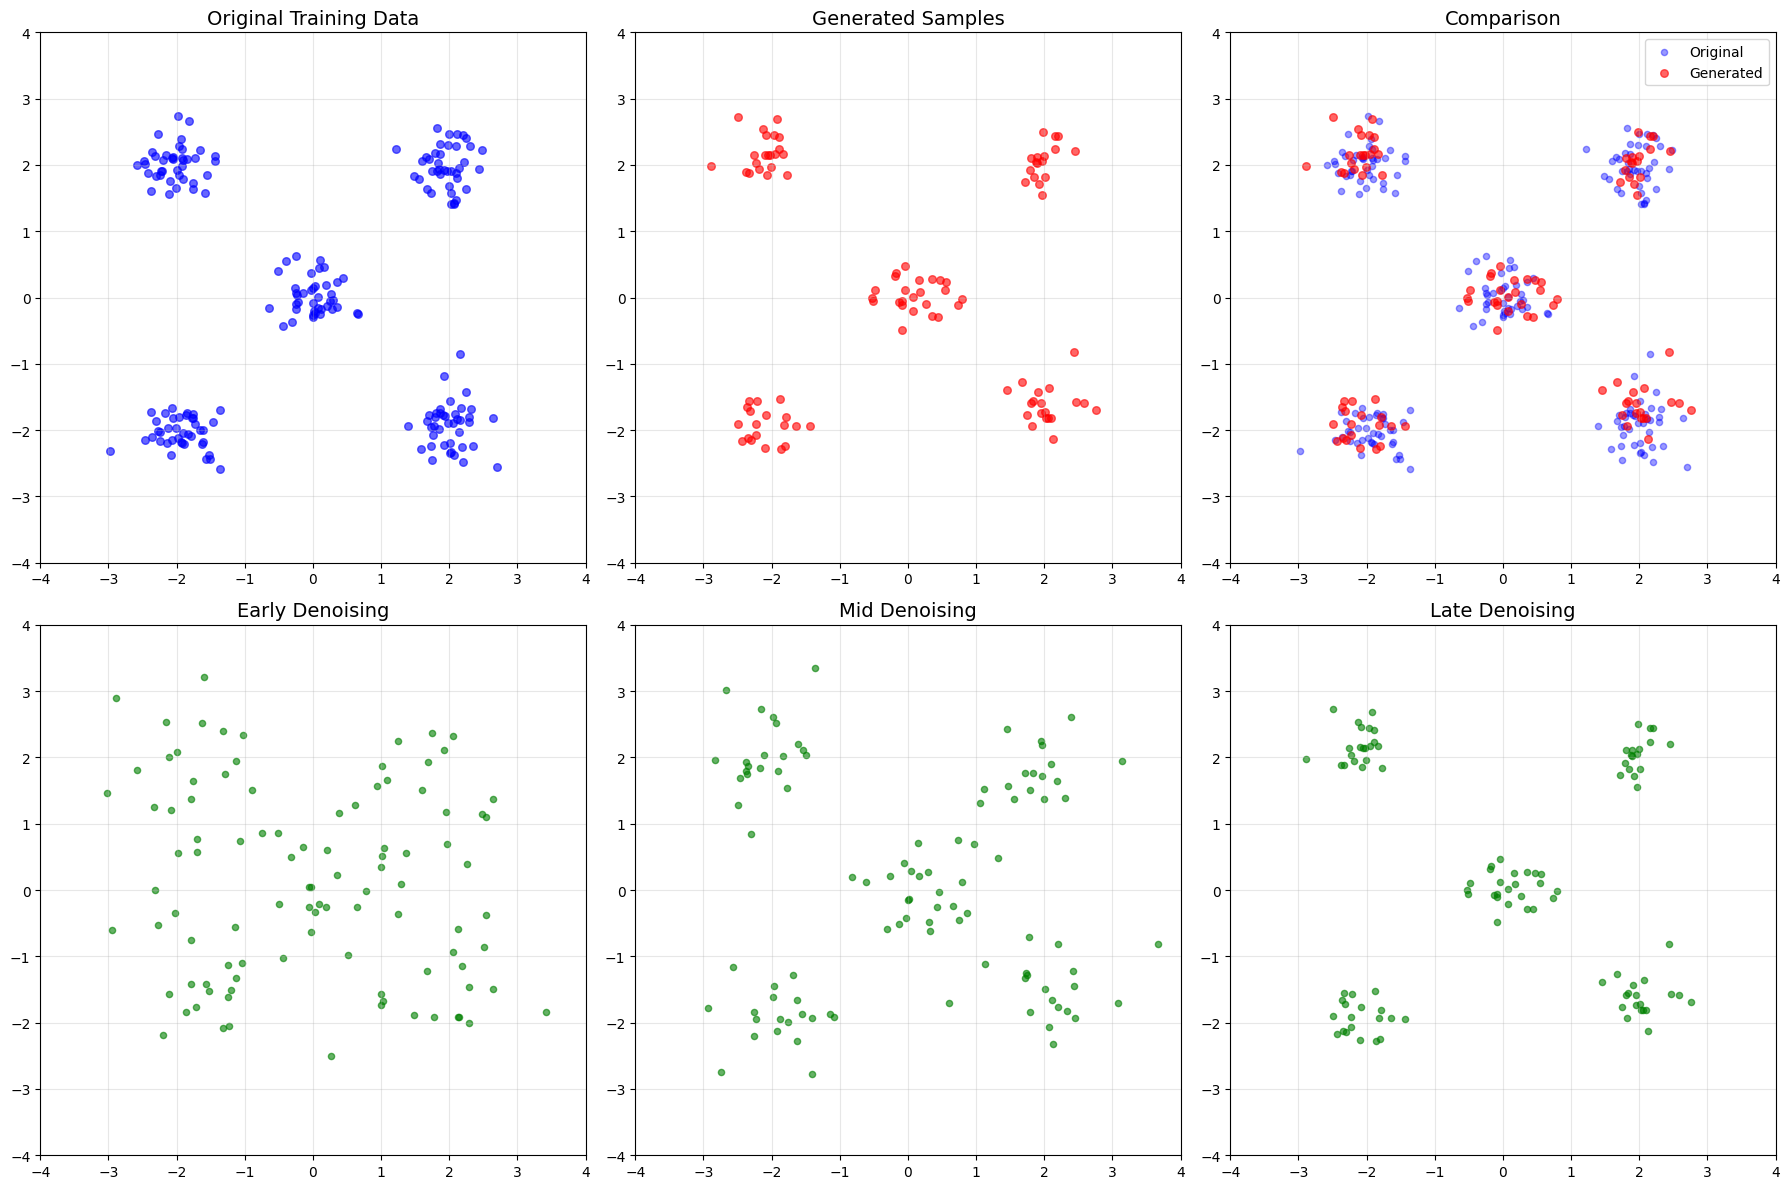

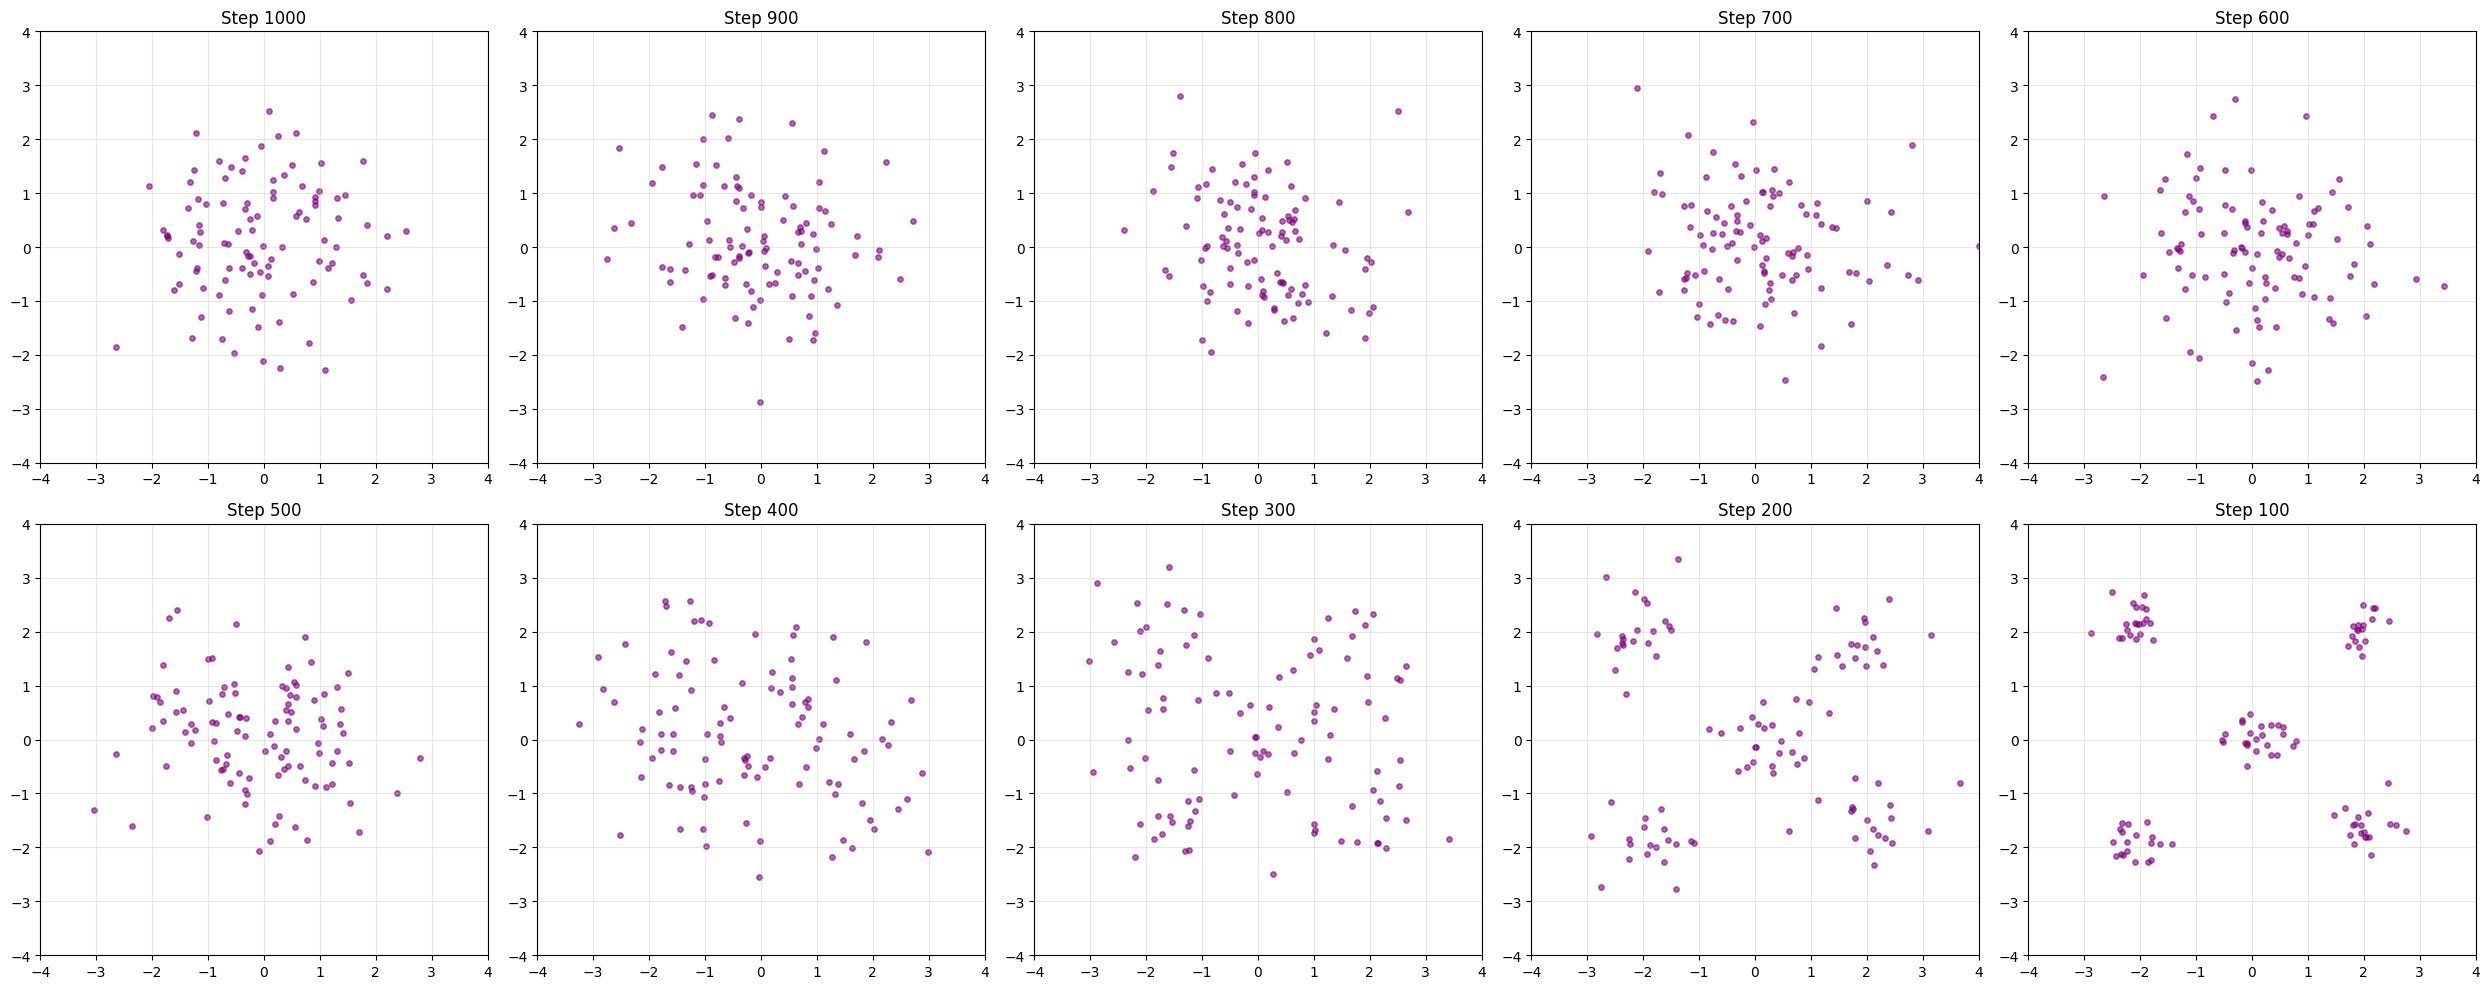

Plotting training metrics...


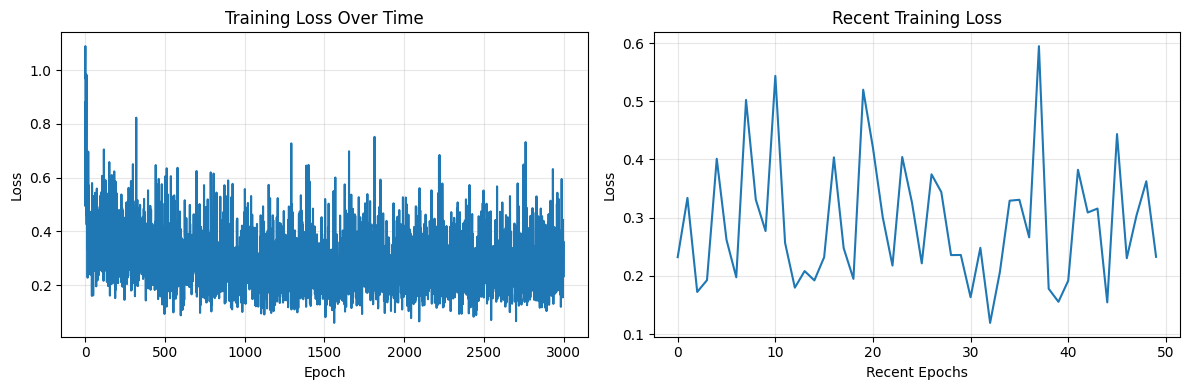

Saving model...

=== EXECUTION COMPLETE ===
Generated files:
- diffusion_results.png: Results visualization
- diffusion_process.png: Sampling process steps
- training_metrics.png: Training loss curves
- diffusion_logs/: Detailed training logs
- diffusion_model_complete.pth: Saved model

Original Data Stats:
Mean: [0.002, 0.012]
Std:  [1.796, 1.808]

Generated Data Stats:
Mean: [-0.090, 0.145]
Std:  [1.827, 1.726]


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import json
from datetime import datetime

torch.manual_seed(42)
np.random.seed(42)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

class DiffusionLogger:
   def __init__(self, log_dir="diffusion_logs"):
       self.log_dir = log_dir
       os.makedirs(log_dir, exist_ok=True)
       self.training_log = []
       self.sampling_log = []
       self.start_time = datetime.now()
       
   def log_training_step(self, epoch, batch_idx, loss, lr, t_mean, epsilon_norm, pred_norm):
       log_entry = {
           'epoch': epoch,
           'batch_idx': batch_idx,
           'loss': loss,
           'learning_rate': lr,
           'timestep_mean': t_mean,
           'epsilon_norm': epsilon_norm,
           'prediction_norm': pred_norm,
           'timestamp': datetime.now().isoformat()
       }
       self.training_log.append(log_entry)
       
   def log_sampling_step(self, step, x_mean, x_std, epsilon_pred_norm):
       log_entry = {
           'step': step,
           'x_mean': x_mean,
           'x_std': x_std,
           'epsilon_pred_norm': epsilon_pred_norm,
           'timestamp': datetime.now().isoformat()
       }
       self.sampling_log.append(log_entry)
       
   def save_logs(self):
       with open(f"{self.log_dir}/training_log.json", 'w') as f:
           json.dump(self.training_log, f, indent=2)
       with open(f"{self.log_dir}/sampling_log.json", 'w') as f:
           json.dump(self.sampling_log, f, indent=2)
           
   def print_summary(self):
       total_time = datetime.now() - self.start_time
       print(f"\n=== TRAINING SUMMARY ===")
       print(f"Total time: {total_time}")
       print(f"Training steps: {len(self.training_log)}")
       print(f"Sampling steps: {len(self.sampling_log)}")
       if self.training_log:
           final_loss = self.training_log[-1]['loss']
           print(f"Final loss: {final_loss:.6f}")

class NoisePredictor(nn.Module):
   def __init__(self, data_dim=2, hidden_dim=256, time_embed_dim=64):
       super(NoisePredictor, self).__init__()
       self.data_dim = data_dim
       self.time_embed_dim = time_embed_dim
       
       self.time_mlp = nn.Sequential(
           nn.Linear(1, time_embed_dim),
           nn.SiLU(),
           nn.Linear(time_embed_dim, time_embed_dim),
           nn.SiLU(),
           nn.Linear(time_embed_dim, time_embed_dim)
       )
       
       self.main_mlp = nn.Sequential(
           nn.Linear(data_dim + time_embed_dim, hidden_dim),
           nn.SiLU(),
           nn.Dropout(0.1),
           nn.Linear(hidden_dim, hidden_dim),
           nn.SiLU(),
           nn.Dropout(0.1),
           nn.Linear(hidden_dim, hidden_dim),
           nn.SiLU(),
           nn.Linear(hidden_dim, data_dim)
       )
   
   def forward(self, x, t):
       batch_size = x.shape[0]
       t_normalized = t.float() / 1000.0
       t_embed = self.time_mlp(t_normalized.view(-1, 1))
       
       x_t_concat = torch.cat([x, t_embed], dim=1)
       noise_pred = self.main_mlp(x_t_concat)
       
       return noise_pred

class DiffusionModel:
   def __init__(self, T=1000, beta_start=0.0001, beta_end=0.02, device='mps'):
       self.T = T
       self.device = device
       
       self.beta = torch.linspace(beta_start, beta_end, T).to(device)
       self.alpha = 1. - self.beta
       self.alpha_bar = torch.cumprod(self.alpha, dim=0)
       
       self.model = NoisePredictor().to(device)
       self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=0.001, weight_decay=0.01)
       self.scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(self.optimizer, T_max=2000)
       self.logger = DiffusionLogger()
       
       print(f"=== DIFFUSION MODEL INITIALIZED ===")
       print(f"Device: {device}")
       print(f"Timesteps: {T}")
       print(f"Beta range: {beta_start} to {beta_end}")
       print(f"Parameters: {sum(p.numel() for p in self.model.parameters())}")
       
   def forward_process(self, x0, t):
       batch_size = x0.shape[0]
       
       epsilon = torch.randn_like(x0)
       
       sqrt_alpha_bar = torch.sqrt(self.alpha_bar[t]).view(batch_size, 1)
       sqrt_one_minus_alpha_bar = torch.sqrt(1 - self.alpha_bar[t]).view(batch_size, 1)
       
       xt = sqrt_alpha_bar * x0 + sqrt_one_minus_alpha_bar * epsilon
       
       return xt, epsilon
   
   def train_step(self, x0, epoch, batch_idx):
       batch_size = x0.shape[0]
       
       t = torch.randint(0, self.T, (batch_size,)).to(self.device)
       
       xt, epsilon = self.forward_process(x0, t)
       
       epsilon_pred = self.model(xt, t)
       
       loss = F.mse_loss(epsilon_pred, epsilon)
       
       self.optimizer.zero_grad()
       loss.backward()
       torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
       self.optimizer.step()
       
       with torch.no_grad():
           epsilon_norm = torch.norm(epsilon).item()
           pred_norm = torch.norm(epsilon_pred).item()
           t_mean = t.float().mean().item()
           lr = self.optimizer.param_groups[0]['lr']
           
           self.logger.log_training_step(
               epoch, batch_idx, loss.item(), lr, t_mean, epsilon_norm, pred_norm
           )
       
       return loss.item()
   
   def sample(self, n_samples=64, save_intermediate=True):
       self.model.eval()
       
       x = torch.randn(n_samples, 2).to(self.device)
       
       intermediate_samples = []
       
       print(f"\n=== SAMPLING {n_samples} SAMPLES ===")
       
       with torch.no_grad():
           for i in tqdm(reversed(range(self.T)), desc="Sampling"):
               t = torch.tensor([i]).repeat(n_samples).to(self.device)
               
               epsilon_pred = self.model(x, t)
               
               alpha_t = self.alpha[i]
               beta_t = self.beta[i]
               sqrt_one_minus_alpha_bar = torch.sqrt(1 - self.alpha_bar[i])
               
               mu = (x - (beta_t / sqrt_one_minus_alpha_bar) * epsilon_pred) / torch.sqrt(alpha_t)
               
               if i > 0:
                   sigma = torch.sqrt(beta_t)
                   x = mu + sigma * torch.randn_like(x)
               else:
                   x = mu
               
               if save_intermediate and i % 100 == 0:
                   intermediate_samples.append(x.clone())
               
               self.logger.log_sampling_step(
                   i, x.mean().item(), x.std().item(), torch.norm(epsilon_pred).item()
               )
       
       self.model.train()
       return x, intermediate_samples
   
   def train(self, data, epochs=2000, log_interval=200):
       print(f"\n=== STARTING TRAINING ===")
       print(f"Dataset size: {len(data)}")
       print(f"Epochs: {epochs}")
       
       for epoch in range(epochs):
           epoch_loss = 0
           
           np.random.shuffle(data)
           
           for batch_idx in range(0, len(data), 32):
               batch_data = data[batch_idx:batch_idx+32]
               x0 = torch.stack(batch_data).to(self.device)
               loss = self.train_step(x0, epoch, batch_idx)
               epoch_loss += loss
           
           self.scheduler.step()
           avg_loss = epoch_loss / (len(data) // 32 + 1)
           
           if epoch % log_interval == 0:
               lr = self.optimizer.param_groups[0]['lr']
               print(f"Epoch {epoch:4d} | Loss: {avg_loss:.6f} | LR: {lr:.6f}")
       
       self.logger.save_logs()
       self.logger.print_summary()

def create_toy_dataset():
   np.random.seed(42)
   torch.manual_seed(42)
   
   centers = [
       [2.0, 2.0],
       [-2.0, 2.0],
       [2.0, -2.0],
       [-2.0, -2.0],
       [0.0, 0.0]
   ]
   
   data = []
   for center in centers:
       for _ in range(40):
           noise = np.random.normal(0, 0.3, 2)
           point = np.array(center) + noise
           data.append(torch.tensor(point, dtype=torch.float32))
   
   print(f"Created dataset with {len(data)} points")
   print(f"Data range: x[{min(d[0] for d in data):.2f}, {max(d[0] for d in data):.2f}], y[{min(d[1] for d in data):.2f}, {max(d[1] for d in data):.2f}]")
   
   return data

def visualize_results(original_data, generated_samples, intermediate_samples=None):
   fig, axes = plt.subplots(2, 3, figsize=(18, 12))
   
   original_np = torch.stack(original_data).numpy()
   generated_np = generated_samples.cpu().numpy()
   
   axes[0, 0].scatter(original_np[:, 0], original_np[:, 1], c='blue', alpha=0.6, s=30)
   axes[0, 0].set_title('Original Training Data', fontsize=14)
   axes[0, 0].grid(True, alpha=0.3)
   axes[0, 0].set_xlim(-4, 4)
   axes[0, 0].set_ylim(-4, 4)
   
   axes[0, 1].scatter(generated_np[:, 0], generated_np[:, 1], c='red', alpha=0.6, s=30)
   axes[0, 1].set_title('Generated Samples', fontsize=14)
   axes[0, 1].grid(True, alpha=0.3)
   axes[0, 1].set_xlim(-4, 4)
   axes[0, 1].set_ylim(-4, 4)
   
   axes[0, 2].scatter(original_np[:, 0], original_np[:, 1], c='blue', alpha=0.4, s=20, label='Original')
   axes[0, 2].scatter(generated_np[:, 0], generated_np[:, 1], c='red', alpha=0.6, s=30, label='Generated')
   axes[0, 2].set_title('Comparison', fontsize=14)
   axes[0, 2].legend()
   axes[0, 2].grid(True, alpha=0.3)
   axes[0, 2].set_xlim(-4, 4)
   axes[0, 2].set_ylim(-4, 4)
   
   if intermediate_samples and len(intermediate_samples) >= 3:
       for i, (samples, title) in enumerate(zip(intermediate_samples[-3:], ['Early Denoising', 'Mid Denoising', 'Late Denoising'])):
           samples_np = samples.cpu().numpy()
           axes[1, i].scatter(samples_np[:, 0], samples_np[:, 1], c='green', alpha=0.6, s=20)
           axes[1, i].set_title(title, fontsize=14)
           axes[1, i].grid(True, alpha=0.3)
           axes[1, i].set_xlim(-4, 4)
           axes[1, i].set_ylim(-4, 4)
   
   plt.tight_layout()
   plt.savefig('diffusion_results.png', dpi=300, bbox_inches='tight')
   plt.show()
   
   if intermediate_samples:
       n_steps = min(10, len(intermediate_samples))
       fig, axes = plt.subplots(2, 5, figsize=(25, 10))
       axes = axes.flatten()
       
       for i in range(n_steps):
           samples = intermediate_samples[i]
           samples_np = samples.cpu().numpy()
           
           axes[i].scatter(samples_np[:, 0], samples_np[:, 1], c='purple', alpha=0.6, s=15)
           step_num = 1000 - i * 100
           axes[i].set_title(f'Step {step_num}', fontsize=12)
           axes[i].grid(True, alpha=0.3)
           axes[i].set_xlim(-4, 4)
           axes[i].set_ylim(-4, 4)
       
       plt.tight_layout()
       plt.savefig('diffusion_process.png', dpi=300, bbox_inches='tight')
       plt.show()

def plot_training_metrics(log_file="diffusion_logs/training_log.json"):
   try:
       with open(log_file, 'r') as f:
           logs = json.load(f)
       
       epochs = [log['epoch'] for log in logs if log['batch_idx'] == 0]
       losses = [log['loss'] for log in logs if log['batch_idx'] == 0]
       
       plt.figure(figsize=(12, 4))
       
       plt.subplot(1, 2, 1)
       plt.plot(epochs, losses)
       plt.title('Training Loss Over Time')
       plt.xlabel('Epoch')
       plt.ylabel('Loss')
       plt.grid(True, alpha=0.3)
       
       recent_losses = losses[-50:] if len(losses) > 50 else losses
       plt.subplot(1, 2, 2)
       plt.plot(recent_losses)
       plt.title('Recent Training Loss')
       plt.xlabel('Recent Epochs')
       plt.ylabel('Loss')
       plt.grid(True, alpha=0.3)
       
       plt.tight_layout()
       plt.savefig('training_metrics.png', dpi=300, bbox_inches='tight')
       plt.show()
       
   except FileNotFoundError:
       print("Training log file not found. Train the model first.")

print("Creating dataset...")
data = create_toy_dataset()

print("Initializing diffusion model...")
diffusion = DiffusionModel(T=1000, device=device)

print("Starting training...")
diffusion.train(data, epochs=3000, log_interval=300)

print("Generating samples...")
generated_samples, intermediate_samples = diffusion.sample(n_samples=100)

print("Visualizing results...")
visualize_results(data, generated_samples, intermediate_samples)

print("Plotting training metrics...")
plot_training_metrics()

print("Saving model...")
torch.save({
   'model_state_dict': diffusion.model.state_dict(),
   'optimizer_state_dict': diffusion.optimizer.state_dict(),
   'beta': diffusion.beta,
   'alpha': diffusion.alpha,
   'alpha_bar': diffusion.alpha_bar,
}, 'diffusion_model_complete.pth')

print("\n=== EXECUTION COMPLETE ===")
print("Generated files:")
print("- diffusion_results.png: Results visualization")
print("- diffusion_process.png: Sampling process steps")
print("- training_metrics.png: Training loss curves")
print("- diffusion_logs/: Detailed training logs")
print("- diffusion_model_complete.pth: Saved model")

generated_stats = {
   'mean': generated_samples.mean(dim=0).cpu().numpy(),
   'std': generated_samples.std(dim=0).cpu().numpy(),
   'min': generated_samples.min(dim=0)[0].cpu().numpy(),
   'max': generated_samples.max(dim=0)[0].cpu().numpy()
}

original_stats = {
   'mean': torch.stack(data).mean(dim=0).numpy(),
   'std': torch.stack(data).std(dim=0).numpy(),
   'min': torch.stack(data).min(dim=0)[0].numpy(),
   'max': torch.stack(data).max(dim=0)[0].numpy()
}

print(f"\nOriginal Data Stats:")
print(f"Mean: [{original_stats['mean'][0]:.3f}, {original_stats['mean'][1]:.3f}]")
print(f"Std:  [{original_stats['std'][0]:.3f}, {original_stats['std'][1]:.3f}]")

print(f"\nGenerated Data Stats:")
print(f"Mean: [{generated_stats['mean'][0]:.3f}, {generated_stats['mean'][1]:.3f}]")
print(f"Std:  [{generated_stats['std'][0]:.3f}, {generated_stats['std'][1]:.3f}]")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import json
from datetime import datetime

# Set random seeds for reproducible results across runs
torch.manual_seed(42)
np.random.seed(42)

# Use MPS (Metal Performance Shaders) for M4 chip acceleration
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

class DiffusionLogger:
    """
    Comprehensive logging system to track training and sampling metrics.
    This helps us understand what's happening during the diffusion process.
    """
    def __init__(self, log_dir="diffusion_logs"):
        self.log_dir = log_dir
        os.makedirs(log_dir, exist_ok=True)  # Create directory if it doesn't exist
        self.training_log = []  # Store training step information
        self.sampling_log = []  # Store sampling step information
        self.start_time = datetime.now()  # Track total training time
        
    def log_training_step(self, epoch, batch_idx, loss, lr, t_mean, epsilon_norm, pred_norm):
        """
        Log metrics from each training step:
        - epoch: Current training epoch
        - batch_idx: Current batch index
        - loss: MSE loss between predicted and actual noise
        - lr: Current learning rate
        - t_mean: Average timestep in this batch
        - epsilon_norm: L2 norm of actual noise
        - pred_norm: L2 norm of predicted noise
        """
        log_entry = {
            'epoch': epoch,
            'batch_idx': batch_idx,
            'loss': loss,
            'learning_rate': lr,
            'timestep_mean': t_mean,
            'epsilon_norm': epsilon_norm,
            'prediction_norm': pred_norm,
            'timestamp': datetime.now().isoformat()
        }
        self.training_log.append(log_entry)
        
    def log_sampling_step(self, step, x_mean, x_std, epsilon_pred_norm):
        """
        Log metrics from each sampling step:
        - step: Current reverse diffusion step (1000 → 0)
        - x_mean: Mean of current sample values
        - x_std: Standard deviation of current sample values
        - epsilon_pred_norm: L2 norm of predicted noise
        """
        log_entry = {
            'step': step,
            'x_mean': x_mean,
            'x_std': x_std,
            'epsilon_pred_norm': epsilon_pred_norm,
            'timestamp': datetime.now().isoformat()
        }
        self.sampling_log.append(log_entry)
        
    def save_logs(self):
        """Save all logs to JSON files for later analysis"""
        with open(f"{self.log_dir}/training_log.json", 'w') as f:
            json.dump(self.training_log, f, indent=2)
        with open(f"{self.log_dir}/sampling_log.json", 'w') as f:
            json.dump(self.sampling_log, f, indent=2)
            
    def print_summary(self):
        """Print a summary of the training process"""
        total_time = datetime.now() - self.start_time
        print(f"\n=== TRAINING SUMMARY ===")
        print(f"Total time: {total_time}")
        print(f"Training steps: {len(self.training_log)}")
        print(f"Sampling steps: {len(self.sampling_log)}")
        if self.training_log:
            final_loss = self.training_log[-1]['loss']
            print(f"Final loss: {final_loss:.6f}")

class NoisePredictor(nn.Module):
    """
    Neural network that predicts noise ε_θ(x_t, t) given:
    - x_t: noisy data at timestep t
    - t: current timestep
    
    Architecture:
    1. Time embedding: Convert timestep to rich representation
    2. Concatenate: Combine data and time embeddings
    3. MLP: Multi-layer perceptron to predict noise
    """
    def __init__(self, data_dim=2, hidden_dim=256, time_embed_dim=64):
        super(NoisePredictor, self).__init__()
        self.data_dim = data_dim  # Dimension of input data (2D points)
        self.time_embed_dim = time_embed_dim  # Dimension of time embedding
        
        # Time embedding network: converts timestep to rich representation
        # This helps the model understand "how much noise" to expect
        self.time_mlp = nn.Sequential(
            nn.Linear(1, time_embed_dim),  # Input: single timestep value
            nn.SiLU(),  # Swish activation (smooth, works well for diffusion)
            nn.Linear(time_embed_dim, time_embed_dim),  # Hidden layer
            nn.SiLU(),
            nn.Linear(time_embed_dim, time_embed_dim)  # Output: time embedding
        )
        
        # Main network: predicts noise from data + time embedding
        self.main_mlp = nn.Sequential(
            nn.Linear(data_dim + time_embed_dim, hidden_dim),  # Input: data + time
            nn.SiLU(),  # Smooth activation
            nn.Dropout(0.1),  # Prevent overfitting
            nn.Linear(hidden_dim, hidden_dim),  # Hidden layer 1
            nn.SiLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim, hidden_dim),  # Hidden layer 2
            nn.SiLU(),
            nn.Linear(hidden_dim, data_dim)  # Output: predicted noise (same dim as input)
        )
    
    def forward(self, x, t):
        """
        Forward pass:
        x: [batch_size, data_dim] - noisy data
        t: [batch_size] - timesteps
        Returns: [batch_size, data_dim] - predicted noise
        """
        batch_size = x.shape[0]
        
        # Normalize timestep to [0, 1] range for stable training
        t_normalized = t.float() / 1000.0
        
        # Create time embedding: timestep → rich representation
        t_embed = self.time_mlp(t_normalized.view(-1, 1))
        
        # Concatenate data and time embedding
        x_t_concat = torch.cat([x, t_embed], dim=1)
        
        # Predict noise using main network
        noise_pred = self.main_mlp(x_t_concat)
        
        return noise_pred

class DiffusionModel:
    """
    Complete Denoising Diffusion Probabilistic Model (DDPM) implementation.
    
    Key components:
    1. Noise schedule: β_t, α_t, ᾱ_t
    2. Forward process: q(x_t | x_0) - adds noise
    3. Reverse process: p_θ(x_{t-1} | x_t) - removes noise
    4. Training: minimize ||ε - ε_θ(x_t, t)||²
    5. Sampling: start from noise, iteratively denoise
    """
    def __init__(self, T=1000, beta_start=0.0001, beta_end=0.02, device='mps'):
        self.T = T  # Number of diffusion timesteps
        self.device = device
        
        # Noise schedule: β_t increases linearly from β_start to β_end
        # β_t controls how much noise to add at each step
        self.beta = torch.linspace(beta_start, beta_end, T).to(device)
        
        # α_t = 1 - β_t: signal retention at each step
        self.alpha = 1. - self.beta
        
        # ᾱ_t = ∏_{s=1}^t α_s: cumulative signal retention
        # This allows us to jump directly to any timestep t
        self.alpha_bar = torch.cumprod(self.alpha, dim=0)
        
        # Initialize neural network and optimizer
        self.model = NoisePredictor().to(device)
        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=0.001, weight_decay=0.01)
        
        # Cosine annealing: gradually reduce learning rate
        self.scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(self.optimizer, T_max=2000)
        
        # Initialize logger
        self.logger = DiffusionLogger()
        
        print(f"=== DIFFUSION MODEL INITIALIZED ===")
        print(f"Device: {device}")
        print(f"Timesteps: {T}")
        print(f"Beta range: {beta_start} to {beta_end}")
        print(f"Parameters: {sum(p.numel() for p in self.model.parameters())}")
        
    def forward_process(self, x0, t):
        """
        Forward process: q(x_t | x_0) = N(x_t; √ᾱ_t x_0, (1-ᾱ_t)I)
        
        This is the reparameterization trick:
        x_t = √ᾱ_t x_0 + √(1-ᾱ_t) ε, where ε ~ N(0, I)
        
        Args:
            x0: [batch_size, data_dim] - clean data
            t: [batch_size] - timesteps
        
        Returns:
            xt: [batch_size, data_dim] - noisy data
            epsilon: [batch_size, data_dim] - noise that was added
        """
        batch_size = x0.shape[0]
        
        # Sample random noise from standard normal distribution
        epsilon = torch.randn_like(x0)
        
        # Get noise schedule values for timesteps t
        sqrt_alpha_bar = torch.sqrt(self.alpha_bar[t]).view(batch_size, 1)
        sqrt_one_minus_alpha_bar = torch.sqrt(1 - self.alpha_bar[t]).view(batch_size, 1)
        
        # Apply reparameterization trick: x_t = √ᾱ_t x_0 + √(1-ᾱ_t) ε
        xt = sqrt_alpha_bar * x0 + sqrt_one_minus_alpha_bar * epsilon
        
        return xt, epsilon
    
    def train_step(self, x0, epoch, batch_idx):
        """
        Single training step:
        1. Sample random timestep t
        2. Add noise to get x_t
        3. Predict noise: ε_θ(x_t, t)
        4. Compute loss: ||ε - ε_θ(x_t, t)||²
        5. Backpropagate and update parameters
        """
        batch_size = x0.shape[0]
        
        # Sample random timestep for each data point
        t = torch.randint(0, self.T, (batch_size,)).to(self.device)
        
        # Forward process: add noise to clean data
        xt, epsilon = self.forward_process(x0, t)
        
        # Predict noise using neural network
        epsilon_pred = self.model(xt, t)
        
        # Compute MSE loss between actual and predicted noise
        loss = F.mse_loss(epsilon_pred, epsilon)
        
        # Backpropagation
        self.optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Compute gradients
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
        
        self.optimizer.step()  # Update parameters
        
        # Log training metrics (without gradients to save memory)
        with torch.no_grad():
            epsilon_norm = torch.norm(epsilon).item()
            pred_norm = torch.norm(epsilon_pred).item()
            t_mean = t.float().mean().item()
            lr = self.optimizer.param_groups[0]['lr']
            
            self.logger.log_training_step(
                epoch, batch_idx, loss.item(), lr, t_mean, epsilon_norm, pred_norm
            )
        
        return loss.item()
    
    def sample(self, n_samples=64, save_intermediate=True):
        """
        Sampling process: p_θ(x_{t-1} | x_t)
        
        Algorithm:
        1. Start with x_T ~ N(0, I) (pure noise)
        2. For t = T, T-1, ..., 1:
           - Predict noise: ε_θ(x_t, t)
           - Compute mean: μ_θ(x_t, t)
           - Sample: x_{t-1} ~ N(μ_θ(x_t, t), σ_t² I)
        3. Return x_0 (clean sample)
        """
        self.model.eval()  # Set to evaluation mode
        
        # Start with pure noise: x_T ~ N(0, I)
        x = torch.randn(n_samples, 2).to(self.device)
        
        intermediate_samples = []  # Store intermediate results
        
        print(f"\n=== SAMPLING {n_samples} SAMPLES ===")
        
        # Disable gradient computation for efficiency
        with torch.no_grad():
            # Reverse diffusion: T → T-1 → ... → 1 → 0
            for i in tqdm(reversed(range(self.T)), desc="Sampling"):
                # Current timestep for all samples
                t = torch.tensor([i]).repeat(n_samples).to(self.device)
                
                # Predict noise at current timestep
                epsilon_pred = self.model(x, t)
                
                # Get noise schedule values
                alpha_t = self.alpha[i]
                beta_t = self.beta[i]
                sqrt_one_minus_alpha_bar = torch.sqrt(1 - self.alpha_bar[i])
                
                # Compute mean of reverse process:
                # μ_θ(x_t, t) = (1/√α_t) * (x_t - (β_t/√(1-ᾱ_t)) * ε_θ(x_t, t))
                mu = (x - (beta_t / sqrt_one_minus_alpha_bar) * epsilon_pred) / torch.sqrt(alpha_t)
                
                if i > 0:
                    # Add noise for all steps except the last one
                    # σ_t = √β_t
                    sigma = torch.sqrt(beta_t)
                    x = mu + sigma * torch.randn_like(x)
                else:
                    # Final step: no noise added
                    x = mu
                
                # Save intermediate results every 100 steps
                if save_intermediate and i % 100 == 0:
                    intermediate_samples.append(x.clone())
                
                # Log sampling metrics
                self.logger.log_sampling_step(
                    i, x.mean().item(), x.std().item(), torch.norm(epsilon_pred).item()
                )
        
        self.model.train()  # Return to training mode
        return x, intermediate_samples
    
    def train(self, data, epochs=2000, log_interval=200):
        """
        Complete training loop:
        1. For each epoch:
           - Shuffle data
           - Process in batches
           - Update learning rate
        2. Save logs and print summary
        """
        print(f"\n=== STARTING TRAINING ===")
        print(f"Dataset size: {len(data)}")
        print(f"Epochs: {epochs}")
        
        for epoch in range(epochs):
            epoch_loss = 0
            
            # Shuffle data each epoch for better training
            np.random.shuffle(data)
            
            # Process data in batches of 32
            for batch_idx in range(0, len(data), 32):
                batch_data = data[batch_idx:batch_idx+32]
                x0 = torch.stack(batch_data).to(self.device)
                loss = self.train_step(x0, epoch, batch_idx)
                epoch_loss += loss
            
            # Update learning rate schedule
            self.scheduler.step()
            avg_loss = epoch_loss / (len(data) // 32 + 1)
            
            # Print progress
            if epoch % log_interval == 0:
                lr = self.optimizer.param_groups[0]['lr']
                print(f"Epoch {epoch:4d} | Loss: {avg_loss:.6f} | LR: {lr:.6f}")
        
        # Save training logs
        self.logger.save_logs()
        self.logger.print_summary()

def create_toy_dataset():
    """
    Create a 2D toy dataset with 5 clusters:
    - 4 clusters at corners: (±2, ±2)
    - 1 cluster at center: (0, 0)
    
    Each cluster has 40 points with Gaussian noise (σ=0.3)
    Total: 200 points
    """
    np.random.seed(42)
    torch.manual_seed(42)
    
    # Define cluster centers
    centers = [
        [2.0, 2.0],   # Top-right
        [-2.0, 2.0],  # Top-left
        [2.0, -2.0],  # Bottom-right
        [-2.0, -2.0], # Bottom-left
        [0.0, 0.0]    # Center
    ]
    
    data = []
    # Generate points around each center
    for center in centers:
        for _ in range(40):  # 40 points per cluster
            # Add Gaussian noise to center position
            noise = np.random.normal(0, 0.3, 2)  # σ=0.3 for tight clusters
            point = np.array(center) + noise
            data.append(torch.tensor(point, dtype=torch.float32))
    
    print(f"Created dataset with {len(data)} points")
    print(f"Data range: x[{min(d[0] for d in data):.2f}, {max(d[0] for d in data):.2f}], y[{min(d[1] for d in data):.2f}, {max(d[1] for d in data):.2f}]")
    
    return data

def visualize_results(original_data, generated_samples, intermediate_samples=None):
    """
    Create comprehensive visualizations:
    1. Original training data
    2. Generated samples
    3. Comparison overlay
    4. Intermediate sampling steps (if available)
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Convert to numpy for plotting
    original_np = torch.stack(original_data).numpy()
    generated_np = generated_samples.cpu().numpy()
    
    # Plot 1: Original training data
    axes[0, 0].scatter(original_np[:, 0], original_np[:, 1], c='blue', alpha=0.6, s=30)
    axes[0, 0].set_title('Original Training Data', fontsize=14)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_xlim(-4, 4)
    axes[0, 0].set_ylim(-4, 4)
    
    # Plot 2: Generated samples
    axes[0, 1].scatter(generated_np[:, 0], generated_np[:, 1], c='red', alpha=0.6, s=30)
    axes[0, 1].set_title('Generated Samples', fontsize=14)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_xlim(-4, 4)
    axes[0, 1].set_ylim(-4, 4)
    
    # Plot 3: Comparison overlay
    axes[0, 2].scatter(original_np[:, 0], original_np[:, 1], c='blue', alpha=0.4, s=20, label='Original')
    axes[0, 2].scatter(generated_np[:, 0], generated_np[:, 1], c='red', alpha=0.6, s=30, label='Generated')
    axes[0, 2].set_title('Comparison', fontsize=14)
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    axes[0, 2].set_xlim(-4, 4)
    axes[0, 2].set_ylim(-4, 4)
    
    # Plot 4-6: Intermediate sampling steps
    if intermediate_samples and len(intermediate_samples) >= 3:
        for i, (samples, title) in enumerate(zip(intermediate_samples[-3:], ['Early Denoising', 'Mid Denoising', 'Late Denoising'])):
            samples_np = samples.cpu().numpy()
            axes[1, i].scatter(samples_np[:, 0], samples_np[:, 1], c='green', alpha=0.6, s=20)
            axes[1, i].set_title(title, fontsize=14)
            axes[1, i].grid(True, alpha=0.3)
            axes[1, i].set_xlim(-4, 4)
            axes[1, i].set_ylim(-4, 4)
    
    plt.tight_layout()
    plt.savefig('diffusion_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Additional plot: Complete sampling process
    if intermediate_samples:
        n_steps = min(10, len(intermediate_samples))
        fig, axes = plt.subplots(2, 5, figsize=(25, 10))
        axes = axes.flatten()
        
        for i in range(n_steps):
            samples = intermediate_samples[i]
            samples_np = samples.cpu().numpy()
            
            axes[i].scatter(samples_np[:, 0], samples_np[:, 1], c='purple', alpha=0.6, s=15)
            step_num = 1000 - i * 100
            axes[i].set_title(f'Step {step_num}', fontsize=12)
            axes[i].grid(True, alpha=0.3)
            axes[i].set_xlim(-4, 4)
            axes[i].set_ylim(-4, 4)
        
        plt.tight_layout()
        plt.savefig('diffusion_process.png', dpi=300, bbox_inches='tight')
        plt.show()

def plot_training_metrics(log_file="diffusion_logs/training_log.json"):
    """
    Plot training metrics from saved logs:
    1. Complete training loss curve
    2. Recent training loss (last 50 epochs)
    """
    try:
        with open(log_file, 'r') as f:
            logs = json.load(f)
        
        # Extract loss values for first batch of each epoch
        epochs = [log['epoch'] for log in logs if log['batch_idx'] == 0]
        losses = [log['loss'] for log in logs if log['batch_idx'] == 0]
        
        plt.figure(figsize=(12, 4))
        
        # Plot 1: Complete training curve
        plt.subplot(1, 2, 1)
        plt.plot(epochs, losses)
        plt.title('Training Loss Over Time')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True, alpha=0.3)
        
        # Plot 2: Recent training (last 50 epochs)
        recent_losses = losses[-50:] if len(losses) > 50 else losses
        plt.subplot(1, 2, 2)
        plt.plot(recent_losses)
        plt.title('Recent Training Loss')
        plt.xlabel('Recent Epochs')
        plt.ylabel('Loss')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('training_metrics.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    except FileNotFoundError:
        print("Training log file not found. Train the model first.")

# === MAIN EXECUTION ===

print("Creating dataset...")
data = create_toy_dataset()  # Create 5-cluster 2D dataset

print("Initializing diffusion model...")
diffusion = DiffusionModel(T=1000, device=device)  # Initialize DDPM

print("Starting training...")
diffusion.train(data, epochs=3000, log_interval=300)  # Train for 3000 epochs

print("Generating samples...")
generated_samples, intermediate_samples = diffusion.sample(n_samples=100)  # Generate 100 new samples

print("Visualizing results...")
visualize_results(data, generated_samples, intermediate_samples)  # Create plots

print("Plotting training metrics...")
plot_training_metrics()  # Plot loss curves

print("Saving model...")
# Save complete model state for later use
torch.save({
    'model_state_dict': diffusion.model.state_dict(),
    'optimizer_state_dict': diffusion.optimizer.state_dict(),
    'beta': diffusion.beta,
    'alpha': diffusion.alpha,
    'alpha_bar': diffusion.alpha_bar,
}, 'diffusion_model_complete.pth')

print("\n=== EXECUTION COMPLETE ===")
print("Generated files:")
print("- diffusion_results.png: Results visualization")
print("- diffusion_process.png: Sampling process steps")
print("- training_metrics.png: Training loss curves")
print("- diffusion_logs/: Detailed training logs")
print("- diffusion_model_complete.pth: Saved model")

# Calculate and display statistics
generated_stats = {
    'mean': generated_samples.mean(dim=0).cpu().numpy(),
    'std': generated_samples.std(dim=0).cpu().numpy(),
    'min': generated_samples.min(dim=0)[0].cpu().numpy(),
    'max': generated_samples.max(dim=0)[0].cpu().numpy()
}

original_stats = {
    'mean': torch.stack(data).mean(dim=0).numpy(),
    'std': torch.stack(data).std(dim=0).numpy(),
    'min': torch.stack(data).min(dim=0)[0].numpy(),
    'max': torch.stack(data).max(dim=0)[0].numpy()
}

print(f"\nOriginal Data Stats:")
print(f"Mean: [{original_stats['mean'][0]:.3f}, {original_stats['mean'][1]:.3f}]")
print(f"Std:  [{original_stats['std'][0]:.3f}, {original_stats['std'][1]:.3f}]")

print(f"\nGenerated Data Stats:")
print(f"Mean: [{generated_stats['mean'][0]:.3f}, {generated_stats['mean'][1]:.3f}]")
print(f"Std:  [{generated_stats['std'][0]:.3f}, {generated_stats['std'][1]:.3f}]")